# I-94 Interstate Highway Traffic

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

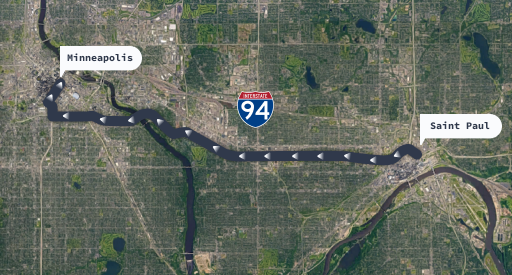


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv(r'Metro_Interstate_Traffic_Volume.csv')

In [2]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

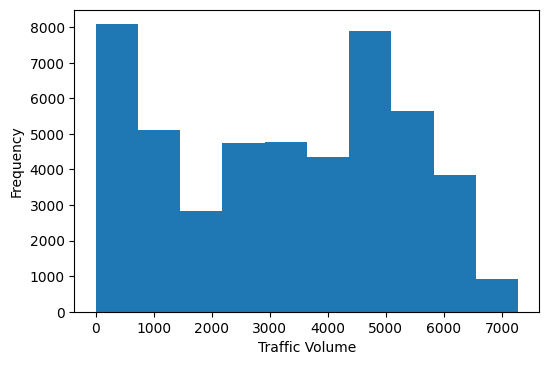

In [5]:
df['traffic_volume'].plot.hist()
sns.set()
plt.xlabel('Traffic Volume')
plt.show()

In [6]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From quickly glancing at the first five values of the dataset and the last five values of the dataset in both the "date_time" and "traffic_volume" columns it appears that traffic volume is much higher in the daytime than in the nighttime.

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

## Traffic Volume: Day vs. Night

In [7]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [8]:
day = df[(df['date_time'].dt.hour).between(7,19)]
night = df[(df['date_time'].dt.hour > 19) | (df['date_time'].dt.hour < 7)]

In [9]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947


In [10]:
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
15,None,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506
...,...,...,...,...,...,...,...,...,...
48184,None,280.17,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 06:00:00,802
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


## Traffic Volume: Day vs. Night (II)

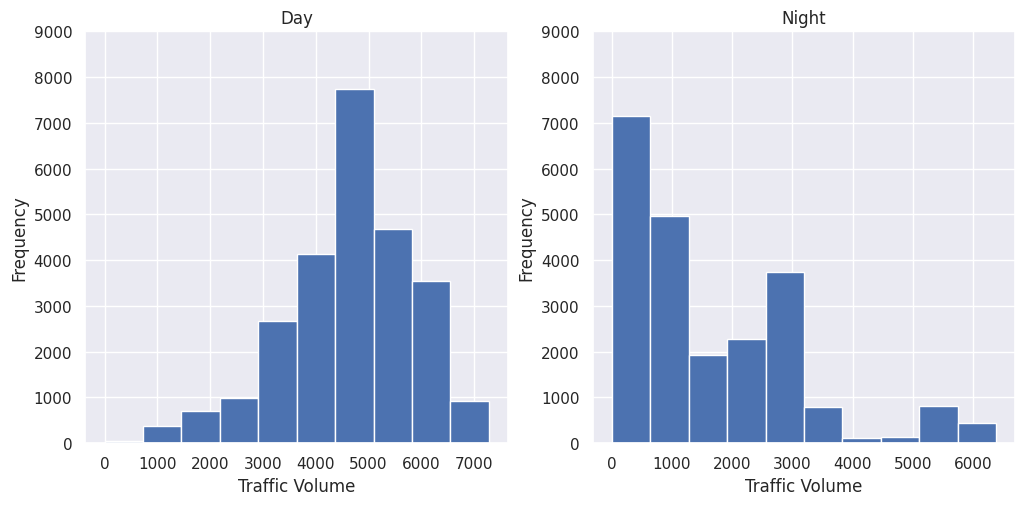

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
day['traffic_volume'].plot.hist()
plt.title('Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,9000])
plt.subplot(2,2,2)
night['traffic_volume'].plot.hist()
plt.title('Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,9000])
sns.set()
plt.show()

In [12]:
day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,25838.000000,25838.000000,25838.000000,25838.000000,25838.000000
mean,282.347796,0.502320,0.000234,53.040135,4649.292360
std,13.302562,61.167614,0.008511,37.590946,1202.321987
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.720000,0.000000,0.000000,5.000000,4021.000000
50%,283.867000,0.000000,0.000000,75.000000,4736.000000
75%,293.610000,0.000000,0.000000,90.000000,5458.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [13]:
night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,22366.000000,22366.000000,22366.000000,22366.000000,22366.000000
mean,279.886677,0.140120,0.000209,45.113386,1654.648484
std,13.257728,1.125004,0.007752,40.183455,1425.175292
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.580000,0.000000,0.000000,1.000000,486.000000
50%,281.150000,0.000000,0.000000,40.000000,1056.500000
75%,290.400000,0.000000,0.000000,90.000000,2630.750000
max,306.290000,55.630000,0.510000,100.000000,6386.000000


The daytime data distribution fits the shape of a normal distribution while the shape of the nighttime distribution is right-skewed.

## Time Indicators

In [14]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-14-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

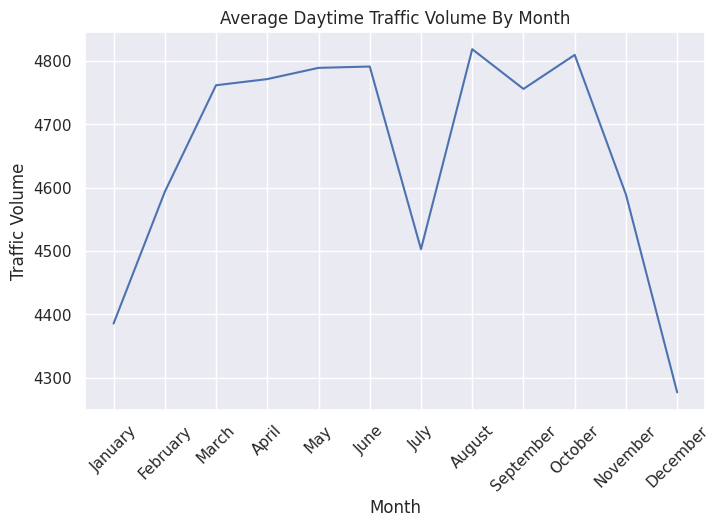

In [15]:
plt.figure(figsize=(8,5))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
by_month['traffic_volume'].plot.line()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11 ,12],
           labels=months,
           rotation=45)
plt.title('Average Daytime Traffic Volume By Month')
plt.ylabel('Traffic Volume')
plt.xlabel('Month')
sns.set()
plt.show()


Traffic volume was at it's lowest during December and January. There was also a tremendous decline in traffic volume in July. The graph ssems to be indicative of a cycle.

## Time Indicators (II)

In [25]:
day['dayofweek'] = day.loc[:,'date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-25-29153580e1d2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

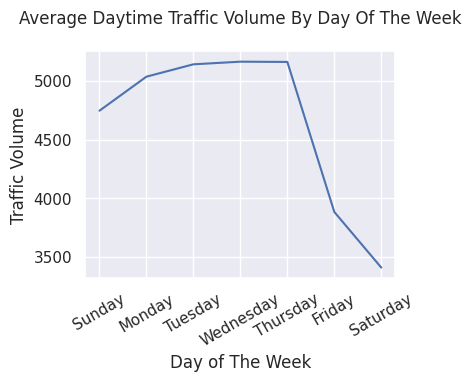

In [17]:
plt.figure(figsize=(4,3))
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
by_dayofweek['traffic_volume'].plot.line()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=days,
           rotation=30)
plt.title('Average Daytime Traffic Volume By Day Of The Week', pad=20)
plt.ylabel('Traffic Volume')
plt.xlabel('Day of The Week')
sns.set()
plt.show()

There is an over 1500 unit exponential declinein traffic volume from Thursday to Saturday.Sunday to Thursday models a logarithmic increase in traffic by roughly 500 units.

## Time Indicators (III)

In [18]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print('\n')
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64


hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-18-783d8bc48f7f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



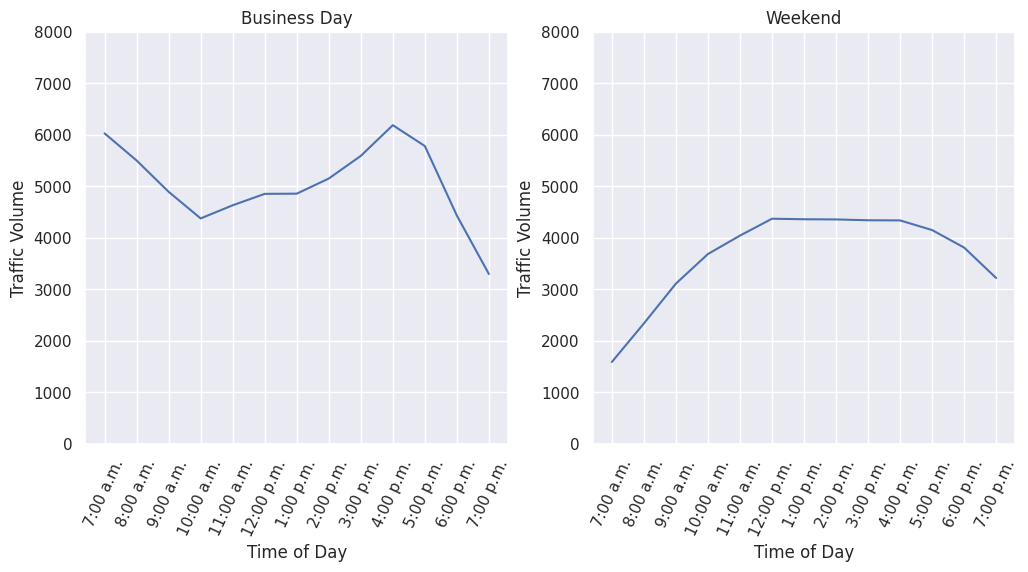

In [19]:
hour = [7,8,9,10,11,12,13,14,15,16,17,18,19]
time = [
    '7:00 a.m.',
    '8:00 a.m.',
    '9:00 a.m.',
    '10:00 a.m.',
    '11:00 a.m.',
    '12:00 p.m.',
    '1:00 p.m.',
    '2:00 p.m.',
    '3:00 p.m.',
    '4:00 p.m.',
    '5:00 p.m.',
    '6:00 p.m.',
    '7:00 p.m.'
]
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlabel("Time of Day")
plt.ylabel("Traffic Volume")
plt.xticks(ticks=hour, labels=time, rotation=65)
plt.ylim([0,8000])
plt.title('Business Day')
plt.subplot(2,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlabel("Time of Day")
plt.ylabel("Traffic Volume")
plt.xticks(ticks=hour, labels=time, rotation=65)
plt.ylim([0,8000])
plt.title('Weekend')
sns.set()
plt.show()

It seems that traffic volume on business days are the highest at 7:00 a.m. and between 3:00 p.m. - 4:00 p.m at slightly above 6,000 carts per hour at both time intervals. There is a rapid linear decline in business day traffic volume from approximately 4:30 pm. onward.

On weekends from 7:00 a.m. to 12:00 p.m. there is logarithmic growth of about 2500 cars over a 5 hour period. The traffic volume never exceeds 4500 cars on the weekend.

Overall daytime traffic on business days has the highest traffic volume by far.

## Weather Indicators

In [20]:
day.corr()['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
dayofweek        -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

Temperature has the highest correlation with traffic volume:

- temp : 0.118084

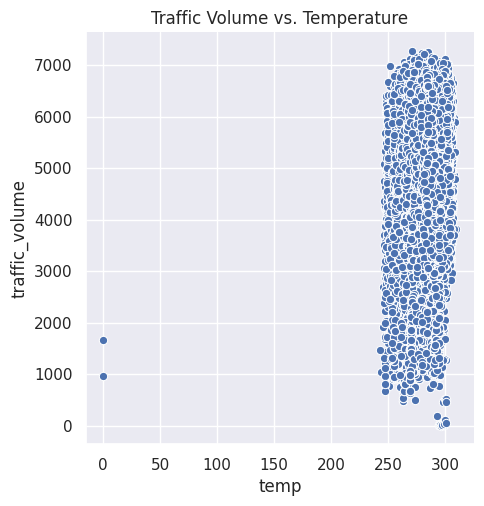

In [21]:
sns.set()
sns.relplot(data=day, x='temp', y='traffic_volume')
plt.title("Traffic Volume vs. Temperature")
plt.show()

The correlation between temperature and traffic volume is not strong enough to make a true determination of whether or not temperature affects traffic flow.

## Weather Types

In [22]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

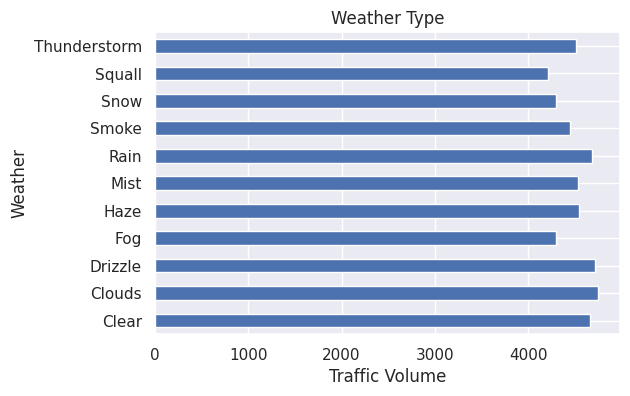

In [23]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.title("Weather Type")
plt.show()

There is not a single weather type that exceeds 5,000 cars, thus we have not yet found a heavy traffic indicator.

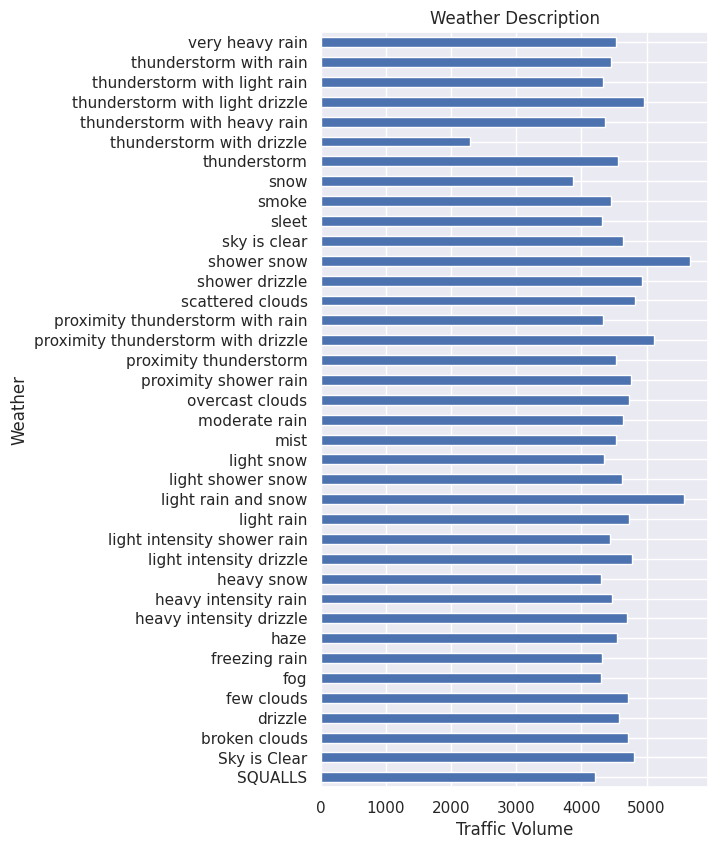

In [24]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.title("Weather Description")
plt.yticks()
plt.show()

From analyzing the average values of the Weather Description column "shower snow", "light rain and snow", and "proximity thunderstorm with drizzle" all have traffic volumes of 5,000 cars or more.

There is no clear reason why average traffic values exceed 5,000 cars for these poor, yet not severe weather conditions. Perhaps more people are rushing out to gather goods in preperation for potentially more severe weather condiions to come.

## Conclusion

After analyzing the I-94 Interstate Highway Traffic dataset we have discoverted two indicators of heavy traffic:

- Time Indicatiors
    - Traffic is typically heavier from March-June, takes a tremendous decline in July, then picks back up from August to October.
    - Traffic is usually heavier on business during normal commuting times (as expected).
    - On business days the primary rush hours are 7:00 a.m. and 4:00 p.m.

- Weather Indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle